In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Data Processing

In [47]:
data = pd.read_csv('twm_customer.csv',sep=';')

In [48]:
data.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


Get rid of columns we wont use

In [49]:
df = data.drop(columns = ['cust_id','first_name','last_name','name_prefix','street_nbr','street_name','city_name','postal_code','state_code'])

### Converting numerical variables to categorical variables

Income

In [50]:
df.income.describe()

count       747.000000
mean      22728.281124
std       22207.221405
min           0.000000
25%        7118.500000
50%       17242.000000
75%       31338.000000
max      144157.000000
Name: income, dtype: float64

In [51]:
df[df.income == 0]

,income,age,years_with_bank,nbr_children,gender,marital_status
6,0,16,1,0,M,1
11,0,15,0,0,M,1
15,0,15,0,0,M,1
17,0,17,2,0,M,1
36,0,15,7,0,M,1
...,...,...,...,...,...,...
718,0,15,0,0,M,1
721,0,13,5,0,F,1
722,0,17,2,0,M,1
734,0,17,2,0,F,1


<AxesSubplot:>

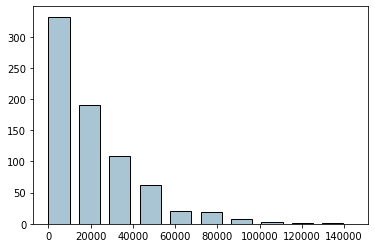

In [52]:
fig, ax = plt.subplots()
df['income'].hist(color='#A9C5D3', edgecolor='black', width=10000,
                          grid=False)

In [53]:
bin_ranges = [-1, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000]
bin_names = [1, 2, 3, 4, 5, 6, 7,8]
df['income'] = pd.cut(np.array(df['income']),bins=bin_ranges,labels=bin_names)

In [54]:
df.head(5)

,income,age,years_with_bank,nbr_children,gender,marital_status
0,2,46,5,1,M,2
1,1,71,1,0,M,2
2,1,38,8,0,F,1
3,3,54,3,0,F,1
4,3,59,9,2,F,4


Age

<AxesSubplot:>

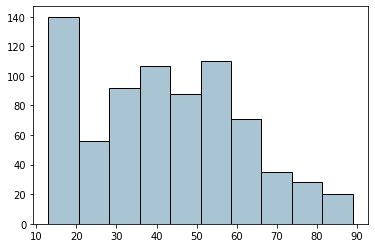

In [55]:
fig, ax = plt.subplots()
df['age'].hist(color='#A9C5D3', edgecolor='black',
                          grid=False)

In [56]:
bin_ranges = [0, 15, 30, 45, 60, 75, 90]
bin_names = [1, 2, 3, 4, 5, 6]
df['age'] = pd.cut(np.array(df['age']),bins=bin_ranges,labels=bin_names)

In [57]:
df

,income,age,years_with_bank,nbr_children,gender,marital_status
0,2,4,5,1,M,2
1,1,5,1,0,M,2
2,1,3,8,0,F,1
3,3,4,3,0,F,1
4,3,4,9,2,F,4
...,...,...,...,...,...,...
742,1,3,6,1,F,4
743,2,4,6,1,M,2
744,4,4,0,2,M,2
745,1,3,7,0,F,2


In [58]:
def getGender(gender):
    if gender == 'M ':
        return 1
    elif gender == 'F ':
        return 0

In [59]:
df['gender'] = df.gender.apply(getGender)

In [60]:
df

,income,age,years_with_bank,nbr_children,gender,marital_status
0,2,4,5,1,1,2
1,1,5,1,0,1,2
2,1,3,8,0,0,1
3,3,4,3,0,0,1
4,3,4,9,2,0,4
...,...,...,...,...,...,...
742,1,3,6,1,0,4
743,2,4,6,1,1,2
744,4,4,0,2,1,2
745,1,3,7,0,0,2


### Normalizing Data

In [61]:
import sklearn.preprocessing as sp
dataScaled = sp.normalize(df)
dataScaled = pd.DataFrame((sp.StandardScaler().fit_transform(dataScaled)),
                              columns=df.columns)

In [62]:
dataScaled

,income,age,years_with_bank,nbr_children,gender,marital_status
0,-0.019996,0.117323,0.473572,0.188672,0.608120,-0.222860
1,-0.707273,1.847837,-1.296386,-0.650356,0.967200,0.312453
2,-1.115241,-1.024885,1.229831,-0.650356,-0.760130,-1.421611
3,1.490828,0.737388,-0.179294,-0.650356,-0.760130,-1.031505
4,-0.105140,-0.971767,0.817319,0.417239,-0.760130,0.332810
...,...,...,...,...,...,...
742,-1.045247,-0.856232,0.662244,0.104547,-0.760130,1.407876
743,-0.193385,-0.161207,0.682778,0.110611,0.480821,-0.412636
744,2.273419,0.462510,-1.894226,1.221187,0.765884,0.012333
745,-1.045247,-0.856232,1.088322,-0.650356,-0.760130,-0.427377


## Multi Dimentional Clustering (Radar Charts)

Plotting Distortions Function

In [101]:
def plot_distortion(X,max_clusters = 10): #max k-values to use =10
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++', #refer to link below
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 


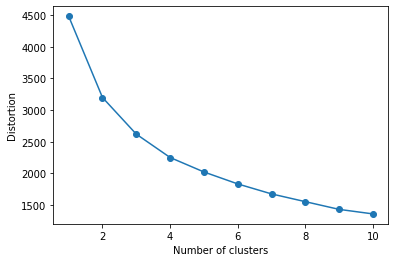

In [102]:
plot_distortion(dataScaled,max_clusters = 10)

Getting Clusters

In [69]:
from sklearn.cluster import KMeans
def KMeansClusters(num_clusters):
    km = KMeans(n_clusters=num_clusters,n_init=10, random_state=0)
    y_km = km.fit_predict(dataScaled)
    return y_km

Plotting Radar Charts 

In [72]:
import plotly.graph_objects as go
def plotRadar(X,y_res):
    fig = go.Figure()
    for i in set(y_res):
        data = X.iloc[(np.where(y_km == i)[0]).tolist(),:]
        dataDict = {'income':data['income'].mean(),
                    'age':data['age'].mean(),
            'years_with_bank':data['years_with_bank'].mean(),
            'nbr_children':data['nbr_children'].mean(),
            'marital_status':data['marital_status'].mean(),
            #'state_code':data['state_code'].mode()[0],
            'gender': data['gender'].mean()}
        dataF = pd.DataFrame.from_records(dataDict,index=[f'{i}'])
        dataFScaled = pd.DataFrame(sp.normalize(dataF),columns=dataF.columns)
        cats = list(dataFScaled.columns)
        r = dataFScaled.iloc[0,:].tolist()
        fig.add_trace(go.Scatterpolar(
          r=r,
          theta=cats,
          fill='toself',
          name=f'cluster{i}'))
    fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[-1, 1]
        )),
      showlegend=False
    )
    fig.show()

3 Clusters:

In [73]:
y_km = KMeansClusters(3)
plotRadar(dataScaled,y_km)

When using 3 clusters, one can indicate the following:
- marrital status and number of children are correlated, hence the first cluster is made up of people that are married and have children 
- The second is based on gender 
- The third cluster is based on the number of years with bank

4 Clusters:

In [74]:
y_km = KMeansClusters(4)
plotRadar(dataScaled,y_km)

When using 4 clusters, one can indicate the following:
- marrital status and number of children still have their own cluster
- gender and income are correlated, probably because more men work than women. And might also have higher paying jobs. hence the second cluster focuses on these features.
- Age and years with bank now each have their own cluster

5 Clusters:

In [76]:
y_km = KMeansClusters(5)
plotRadar(dataScaled,y_km)

When using 5 clusters, one can indicate the following:
- Age, gender and income now have their own clusters

Based on the graphs above, 4 clusters make the most sense since the results are most interpretable in that case

## 2 Dimentional Clustering (using PCA)

In [78]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import plotly.express as px

Plots after PCA

In [79]:
def plotPCA(data, n):
    features =  list(data.columns.values)
    n_components = n
    pca = PCA(n_components)
    components = pca.fit_transform(data[features])
    labels = {
        str(i): f'PCA ' +  str(i+1)
        for i, var in enumerate(pca.explained_variance_ratio_ * 100)
    }
    fig = px.scatter_matrix(
        components,
        labels=labels,
        dimensions=range(n_components)
    )
    fig.update_traces(diagonal_visible=False)
    fig.show()

In [80]:
plotPCA(dataScaled, 2)

In [81]:
dataScaled.to_csv('dataScaled.csv',index=False)